# Tasks about `pandas`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import requests
pd.options.mode.chained_assignment = None

## Task 1

Build histograms for the distribution of each nucleotide at each position in the read.

### 1. Download the DataFrame

In [2]:
r = requests.get("https://raw.githubusercontent.com/Serfentum/bf_course/master/14.pandas/train.csv")
data = StringIO(r.text)
df = pd.read_csv(data, sep=",")

In [3]:
df.head(20)

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN
5,284,8048,7094,104,864,241,24.0,57.0,26.0,NaN,0.002687,0.002429,NaN,0.006792
6,285,8046,679,3245,4134,5,113.0,87.0,3054.0,NaN,0.013775,0.378969,NaN,0.010085
7,286,8041,363,3473,4215,9,NaN,171.0,123.0,3196.0,NaN,0.014827,0.396426,0.020433
8,287,8044,4665,646,2743,69,68.0,287.0,NaN,300.0,0.007369,NaN,0.037132,0.035034
9,288,8046,3443,1867,2752,431,NaN,200.0,27.0,1639.0,NaN,0.003225,0.203715,0.024011


Observation:

Where there are `NaN`-s, should be filled out with the "remaining" number of positions. E.g., for position 0 - total number of reads are 8045. However, the numbers of the nucleotides A, C, T only add up to 7976 (also, their frequences do not add up to 1). Therefore, the places where there is `NaN` should be the rest.

In [4]:
f = df.columns.get_loc
ACGT = df.iloc[:, np.r_[f("reads_all"), f("A"):f("A_fraction")]]


def get_el_pd_df(pd_df, ind_ls):
    """
    Gets the cell value, element, from a list with 2 indices (1st - row, 2nd - column)
    @param pd_df: pandas DataFrame
    @param ind_ls: list of 2 elements, 1st - row, 2nd - column
    @return: object, cell value of the pandas DataFrame at the ind_ls
    """
    return pd_df.iloc[[ind_ls[0]], [ind_ls[1]]].iloc[0, 0]


def sum_of_el_pd_df(pd_df, ind_ls):
    """
    Calculates sum of the cell values, elements indicated by the list of indices (list of sublists)
    @param pd_df: pandas DataFrame
    @param ind_ls: list, list of sublists, each sublist a list of 2 elements, 1st - row, 2nd - column
    @return: int, sum of the cell values
    """
    elements = []
    for i in ind_ls:
        elements.append(get_el_pd_df(pd_df, i))
    return sum(elements)


In [5]:
nans = np.array(np.where(ACGT.isnull())).T  # Indices of NaNs (each row 2-element list)
not_nans = np.array(np.where(ACGT.notnull())).T  # Indices of Not NaNs
for i in range(len(ACGT)):
    ind_nan = nans[i]  # Getting the list of nan indices
    ind_not_nan = not_nans[4 * i:4 * i + 4]  # Getting the list of not nan indices
    # Getting the number of reads
    num_reads = get_el_pd_df(ACGT, ind_not_nan[0])
    # Getting the sum of the other not-nan nucleotides
    sum_nuc = sum_of_el_pd_df(ACGT, ind_not_nan[1:4])
    # Substituting the nan-elements
    ACGT.at[ind_nan[0], ACGT.columns[ind_nan[1]]] = num_reads - sum_nuc

Adding the frequency column:

In [6]:
nucleotides = ["A", "C", "T", "G"]
for nuc in nucleotides:
    ACGT[nuc + "_frequency"] = ACGT[nuc] / ACGT["reads_all"]

In [7]:
ACGT

,reads_all,A,C,T,G,A_frequency,C_frequency,T_frequency,G_frequency
0,8045,7911.0,54.0,11.0,69.0,0.983344,0.006712,0.001367,0.008577
1,8045,7997.0,16.0,13.0,19.0,0.994034,0.001989,0.001616,0.002362
2,8045,7993.0,24.0,4.0,24.0,0.993536,0.002983,0.000497,0.002983
3,8049,105.0,11.0,395.0,7538.0,0.013045,0.001367,0.049074,0.936514
4,8042,46.0,7872.0,93.0,31.0,0.005720,0.978861,0.011564,0.003855
...,...,...,...,...,...,...,...,...,...
58,8056,7579.0,63.0,47.0,367.0,0.940789,0.007820,0.005834,0.045556
59,8061,17.0,7985.0,26.0,33.0,0.002109,0.990572,0.003225,0.004094
60,8062,14.0,14.0,33.0,8001.0,0.001737,0.001737,0.004093,0.992434
61,8061,7910.0,75.0,43.0,33.0,0.981268,0.009304,0.005334,0.004094


In [8]:
ACGT["pos"] = df["pos"]

Now we have a dataframe, with all of the values filled up and we can proceed to plotting them as a histogram.

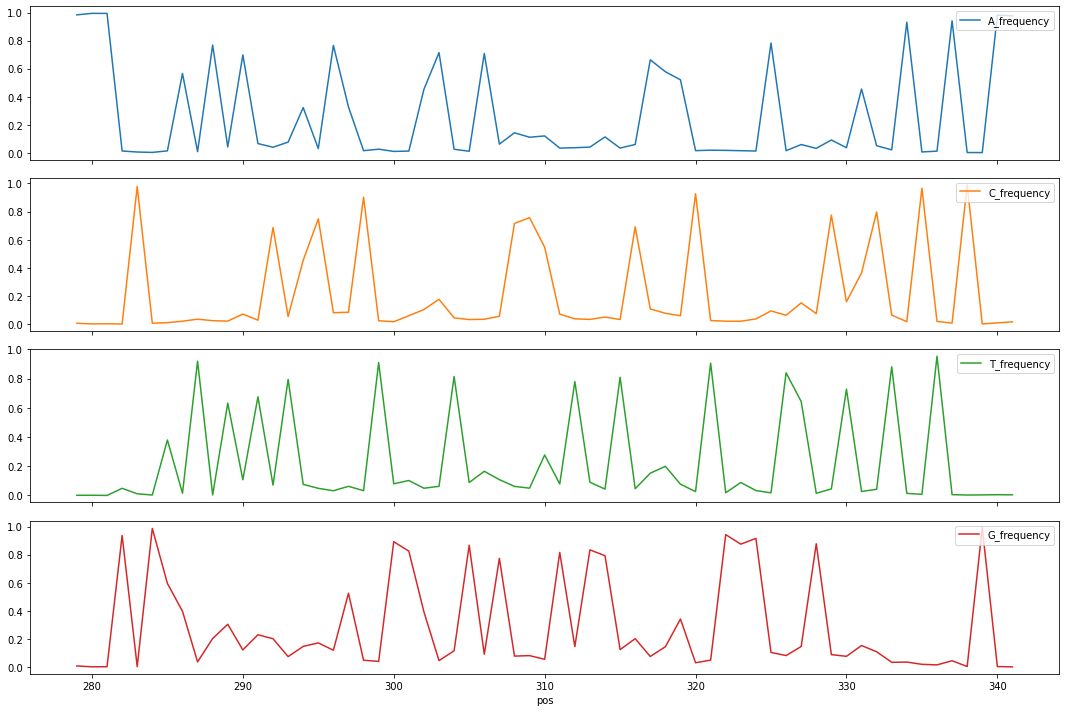

In [193]:
ACGT[['pos'] + [x + "_frequency" for x in nucleotides]].plot(x='pos', stacked=True,
                                                             figsize=(15, 10), subplots=True,
                                                            legend='upper right')
plt.tight_layout() 
plt.savefig("ACGT_frequency_plt.jpg")
for ax in plt.gcf().axes:
    ax.legend(loc=1)
plt.show()

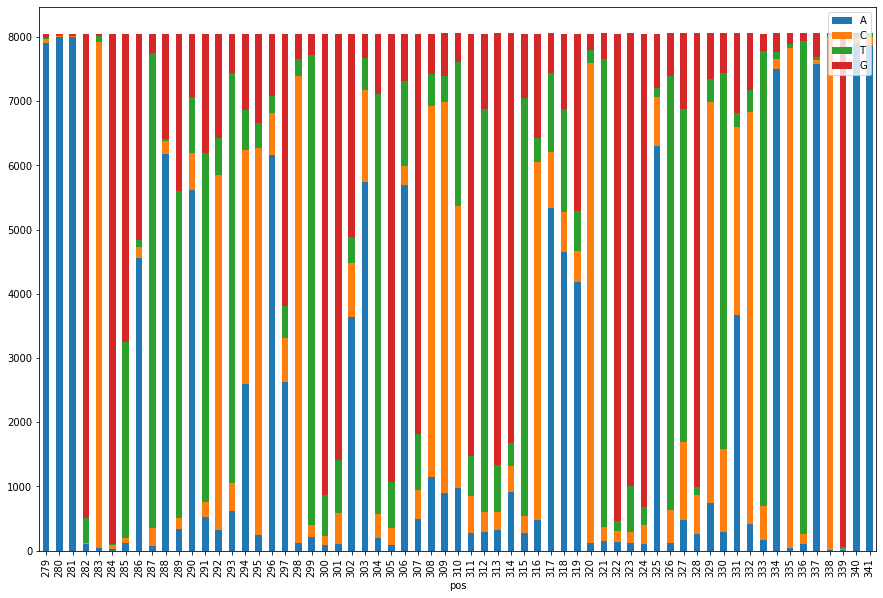

In [10]:
ACGT[['pos'] + nucleotides].plot(x='pos', kind='bar', stacked=True,
                                 figsize=(15, 10))
plt.savefig("ACGT_count_hist.jpg")
plt.legend(loc='upper right')
plt.show()

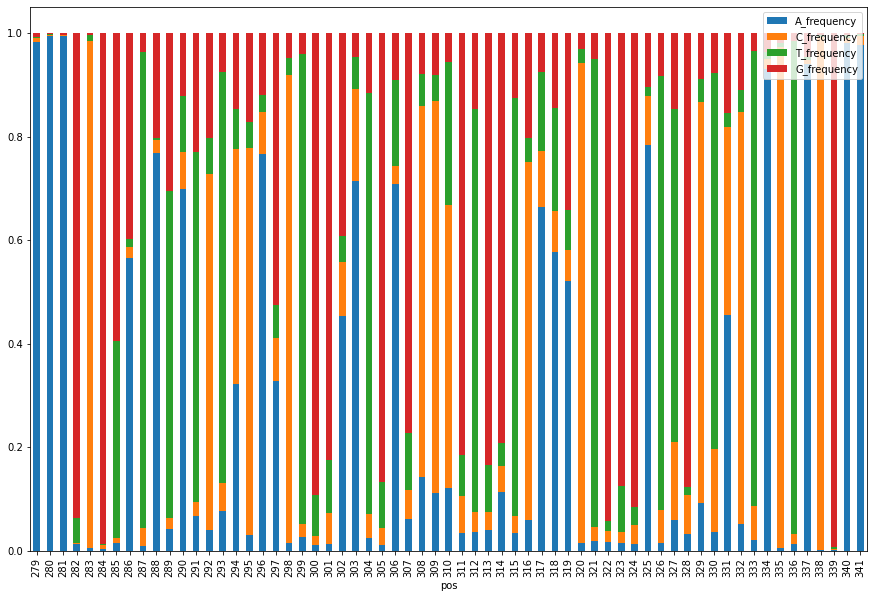

In [11]:
ACGT[['pos'] + [x + "_frequency" for x in nucleotides]].plot(x='pos', kind='bar', stacked=True,
                                                             figsize=(15, 10))
plt.legend(loc='upper right')
plt.savefig("ACGT_freq_hist.jpg")
plt.show()

## Task 2

Selecting rows where `matche` more than average and the specific columns:

In [12]:
df_part = df[df["matches"] > df["matches"].mean()][["pos", "reads_all", "mismatches", "deletions", "insertions"]]

Converting to `csv`.

In [13]:
df_part.to_csv("train_part.csv")

## Task 3 - EDA

[Data source](https://www.kaggle.com/rohitsahoo/sales-forecasting)

### 1. Loading data

In [14]:
data = pd.read_csv("SampleSuperstore.csv")

### 2. Checking it

In [15]:
data.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [16]:
data.tail(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


### 3. Info, Statistics, NaN

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [18]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Check for `NaN`s:

In [19]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No `NaN`s, that means we can proceed to visualization of the data.

Check for duplicates:

In [20]:
data.duplicated().sum()

17

In [21]:
data.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [50]:
for column in data.columns:
    print(f"Column {column}\n{data[column].value_counts()}")

Column Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64
Column Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64
Column City
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64
Column State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana

In [22]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

Dropping columns Country (just one, so doesn't matter) and the Postal code (having them in correlation/dependency doesn't make sense), as they do not make any difference to our further analysis.

In [23]:
data.drop(["Country", "Postal Code"], axis=1, inplace=True)

### 4. Correlation and dependencies

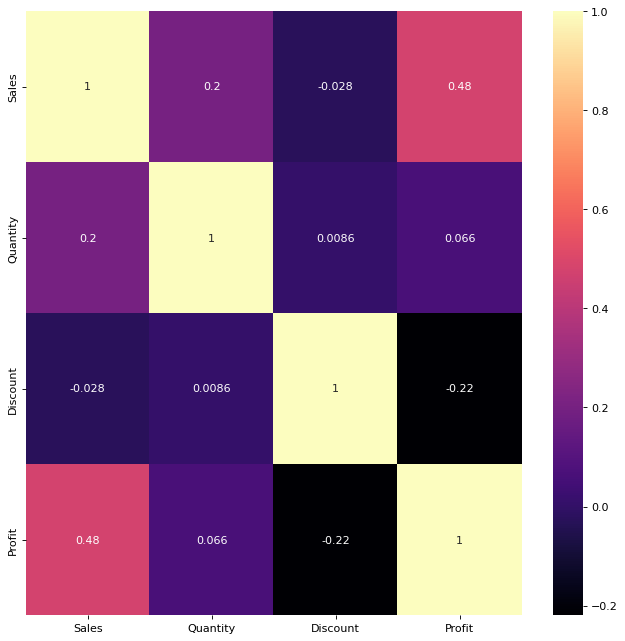

In [24]:
plt.figure(figsize=(10, 10), dpi=80)
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
           cmap='magma', annot=True);

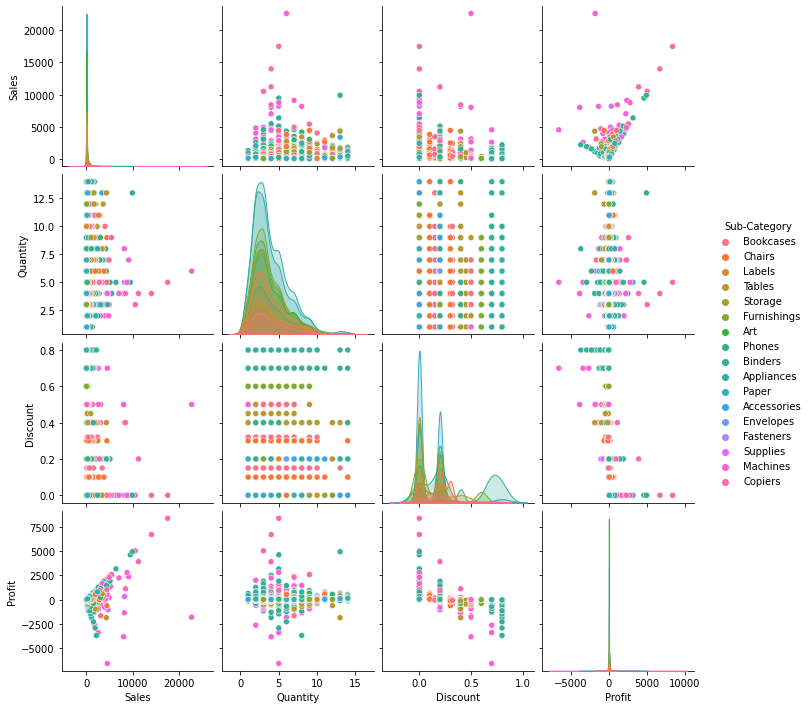

In [71]:
sns.pairplot(data, diag_kind='kde', hue='Sub-Category');

### 5. Visualizing some aspects

Profit dependency on the state:

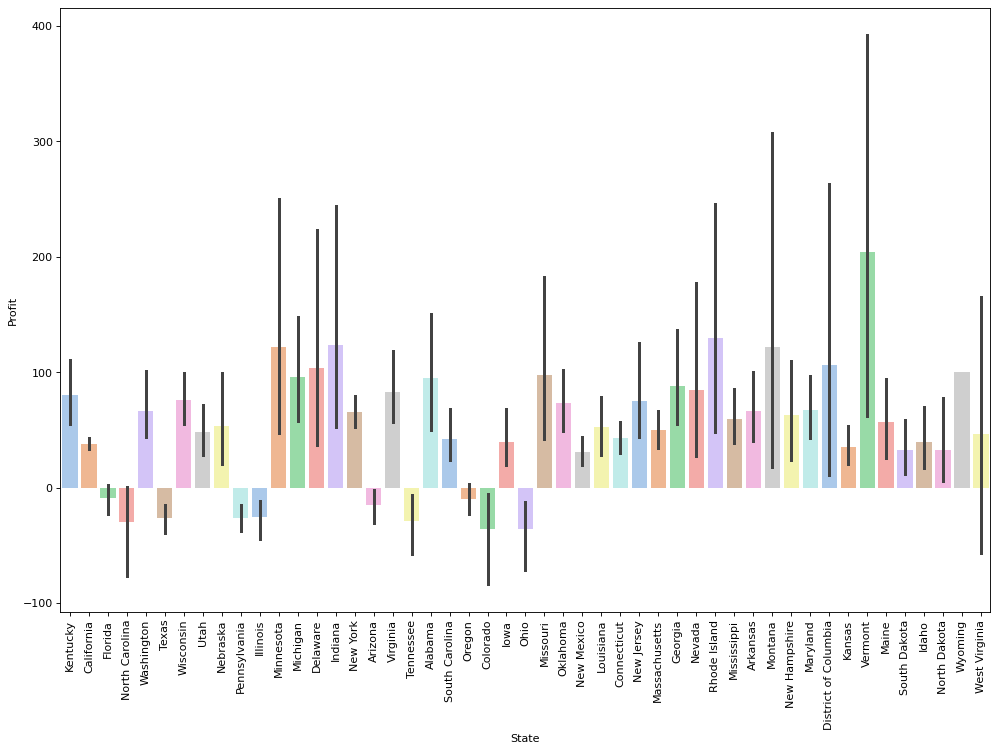

In [43]:
plt.figure(figsize=(15, 10), dpi=80)
sns.barplot(x=data['State'], y=data['Profit'], palette='pastel')
plt.xticks(rotation=90);

Some states are difinitely more profitable than others. Let's see ho uniformly each state is represented:

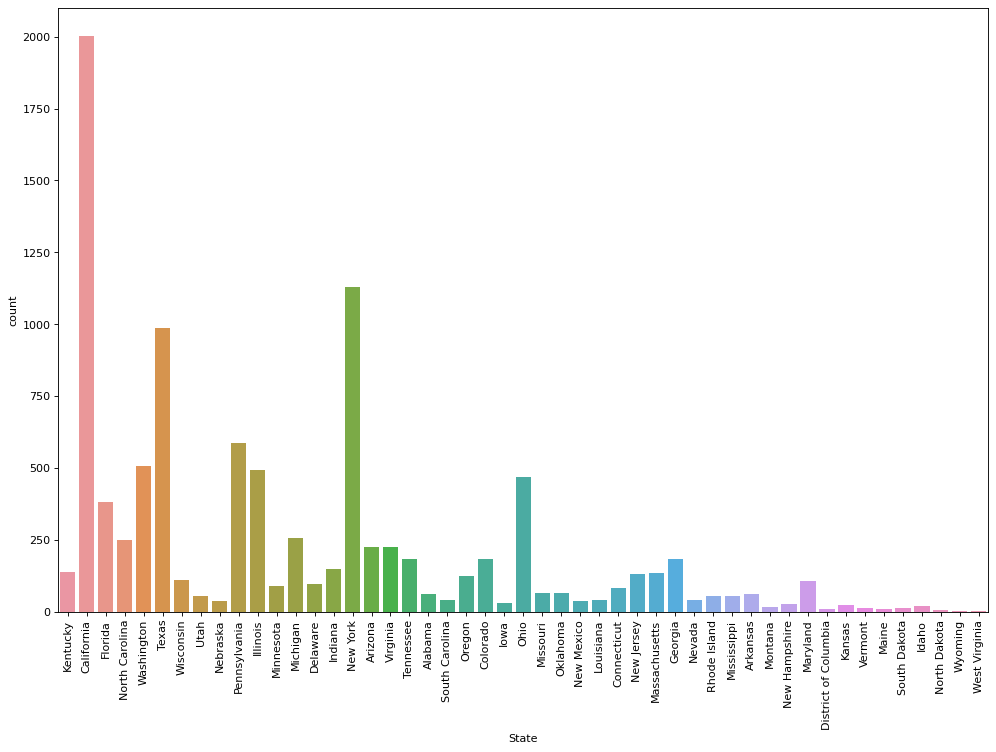

In [56]:
plt.figure(figsize=(15, 10), dpi=80)
sns.countplot(x='State', data=data)
plt.xticks(rotation=90);

Profit dependency on the subcategory:

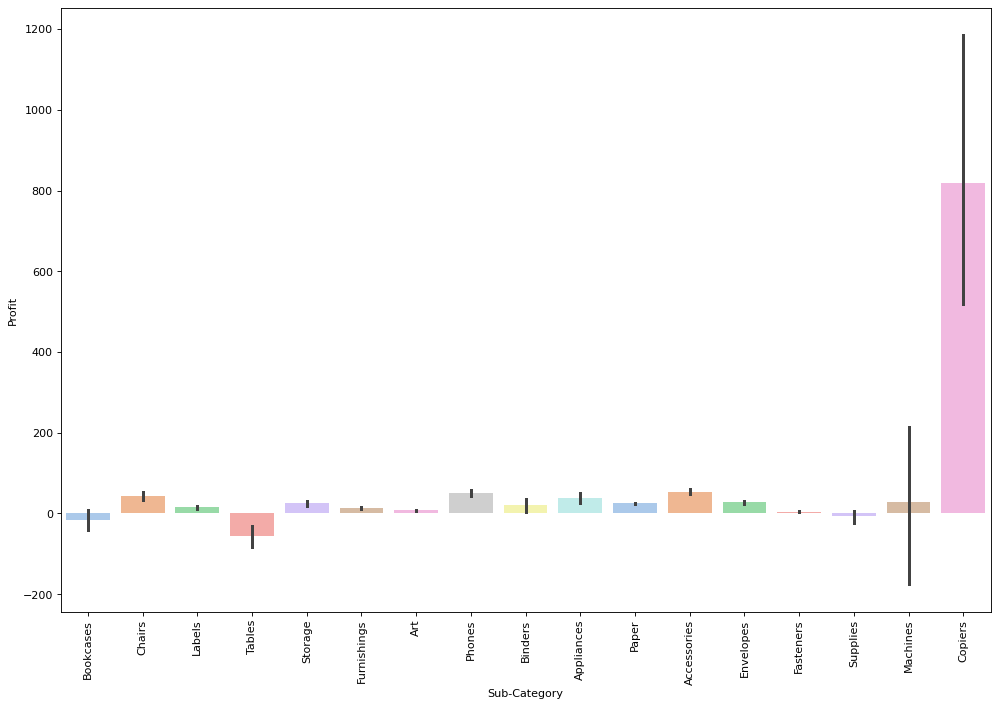

In [44]:
plt.figure(figsize=(15, 10), dpi=80)
sns.barplot(x=data['Sub-Category'], y=data['Profit'], palette='pastel')
plt.xticks(rotation=90);

The category `Copiers` is selling the best.

Let's see how `Discount` and `Quantity` influence `Profit`:

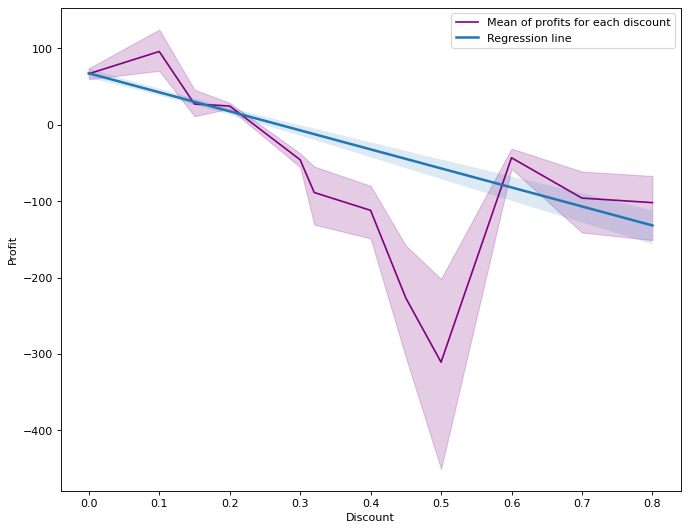

In [69]:
plt.figure(figsize=(10, 8), dpi=80)
sns.lineplot(x='Discount', y='Profit', data=data,
            color='purple', label="Mean of profits for each discount")
sns.regplot(x='Discount', y='Profit', data=data,
           scatter=False, label="Regression line")
plt.legend();

Profit seems to be less for more discount.

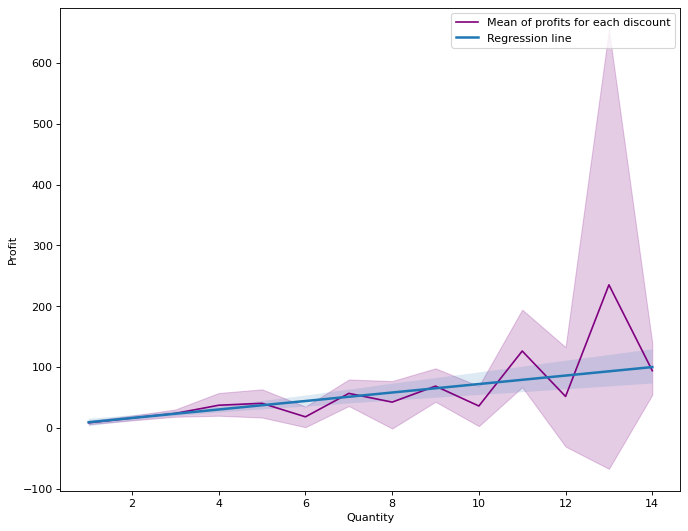

In [70]:
plt.figure(figsize=(10, 8), dpi=80)
sns.lineplot(x='Quantity', y='Profit', data=data,
            color='purple', label="Mean of profits for each discount")
sns.regplot(x='Quantity', y='Profit', data=data,
           scatter=False, label="Regression line")
plt.legend();

More quantity --> more profit.

## Task 4

### 4.1 Write functions to read `.bed` and `.gff` files

In [117]:
def read_gff(path_to_GFF_file):
    """
    Returns the GFF file as pandas DataFrame
    @param path_to_GFF_file: str, path to GFF file
    @return: pandas DataFrame
    """
    gff_col = ["chromosome",
               "source",
               "type",
               "start",
               "end",
               "score",
               "strand",
               "phase",
               "attribute"]
    return pd.read_csv("rrna_annotation.gff",
                       sep="\t",
                       names=gff_col,
                       comment="#")

In [88]:
def read_bed6(path_to_BED_file):
    """
    Reads the 6-column BED file and returns it as a pandas DataFrame
    @param path_to_BED_file:
    @return:
    """
    bed_col = ["chromosome",
               "start",
               "end",
               "name",
               "score",
               "strand"]
    return pd.read_csv(path_to_BED_file,
                       sep="\t",
                       names=bed_col)

### 4.2 Replace long `attribute` RNA descriptions with the short ones

In [118]:
gff["attribute"] = gff["attribute"].str.split("=").str[2].str.split(" ").str[0]

In [119]:
gff

,chromosome,source,type,start,end,score,strand,phase,attribute
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


### 4.3 Table

In [136]:
gff.loc[:, ["chromosome", "attribute"]].value_counts().reset_index(name='counts')

,chromosome,attribute,counts
0,Reference_20,16S,11
1,Reference_20,23S,10
2,Reference_4,23S,10
3,Reference_20,5S,10
4,Reference_7,16S,9
...,...,...,...
71,Reference_21,5S,1
72,Reference_23,16S,1
73,Reference_23,23S,1
74,Reference_23,5S,1


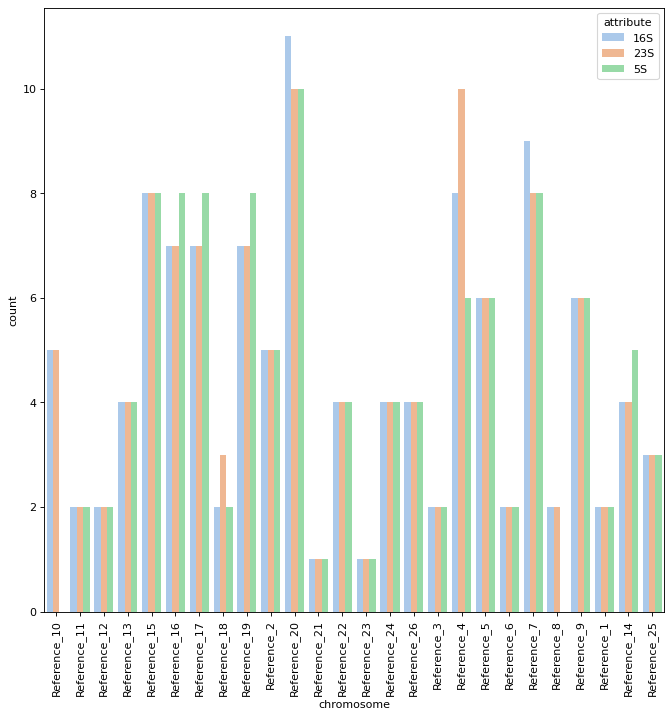

In [141]:
plt.figure(figsize=(10, 10), dpi=80)
sns.countplot(x=gff.chromosome, data=gff, hue=gff.attribute, palette='pastel')
plt.xticks(rotation=90)
plt.show()

### 4.3 `bedtools intersect` in pandas

Whole `rRNAs` in the contig.

First, we have to convert gff to bed:

The gff2bed script converts 1-based, closed [start, end] General Feature Format v3 (GFF3) to sorted, 0-based, half-open \[start-1, end) extended BED-formatted data. [Original gff2bed](https://bedops.readthedocs.io/en/latest/content/reference/file-management/conversion/gff2bed.html)

In [149]:
def gff2bed(gff):
    """
    Converts GFF pandas DataFrame coordinates to BED coordinates
    @param gff: pandas DataFrame, gff
    @return: pandas DataFrame with BED coordinates
    """
    gff_2_bed = gff.copy()
    gff_2_bed.start -= 1
    return gff_2_bed

In [151]:
gff_2_bed = gff2bed(gff)

In [181]:
mrg = gff_2_bed.merge(bed, how='inner', on='chromosome')

In [183]:
filt_mrg = mrg[(mrg["start_y"] <= mrg["start_x"]) & (mrg["end_y"] >= mrg["end_x"])]

In [184]:
filt_mrg

,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,attribute,start_y,end_y,name,score_y,strand_y
129,Reference_11,barrnap:0.9,rRNA,924357,925855,0.000000e+00,+,.,16S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
156,Reference_11,barrnap:0.9,rRNA,926696,929642,0.000000e+00,+,.,23S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
183,Reference_11,barrnap:0.9,rRNA,929826,929936,1.400000e-12,+,.,5S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
215,Reference_11,barrnap:0.9,rRNA,2074459,2075957,0.000000e+00,+,.,16S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
242,Reference_11,barrnap:0.9,rRNA,2076798,2079744,0.000000e+00,+,.,23S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121855,Reference_14,barrnap:0.9,rRNA,2433039,2433152,2.000000e-12,-,.,5S,2433027,2433434,NODE_6108_length_407_cov_1153.232955,0,+
122182,Reference_14,barrnap:0.9,rRNA,3766951,3767064,2.000000e-12,-,.,5S,3766939,3767346,NODE_6108_length_407_cov_1153.232955,0,+
122583,Reference_25,barrnap:0.9,rRNA,1329369,1329473,2.900000e-10,-,.,5S,1329345,1329810,NODE_5333_length_465_cov_547.609756,0,-
125060,Reference_25,barrnap:0.9,rRNA,1822912,1823016,2.900000e-10,+,.,5S,1822575,1823040,NODE_5333_length_465_cov_547.609756,0,+
